In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
coffee = pd.read_csv("coffee.csv")
coffee



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_path = '/mnt/data/coffee.csv'
df = pd.read_csv("coffee.csv")

# Grouping by product_category and product_detail, then summing the transaction_qty to find the total orders
total_orders = df.groupby(['product_category', 'product_detail'])['transaction_qty'].sum().reset_index()

# Renaming the columns to match the required format
total_orders.columns = ['category', 'product', 'total_order']

# Display the resulting DataFrame
total_orders.head()


,category,product,total_order
0,Bakery,Almond Croissant,1911
1,Bakery,Chocolate Chip Biscotti,1924
2,Bakery,Chocolate Croissant,3096
3,Bakery,Cranberry Scone,2092
4,Bakery,Croissant,1954


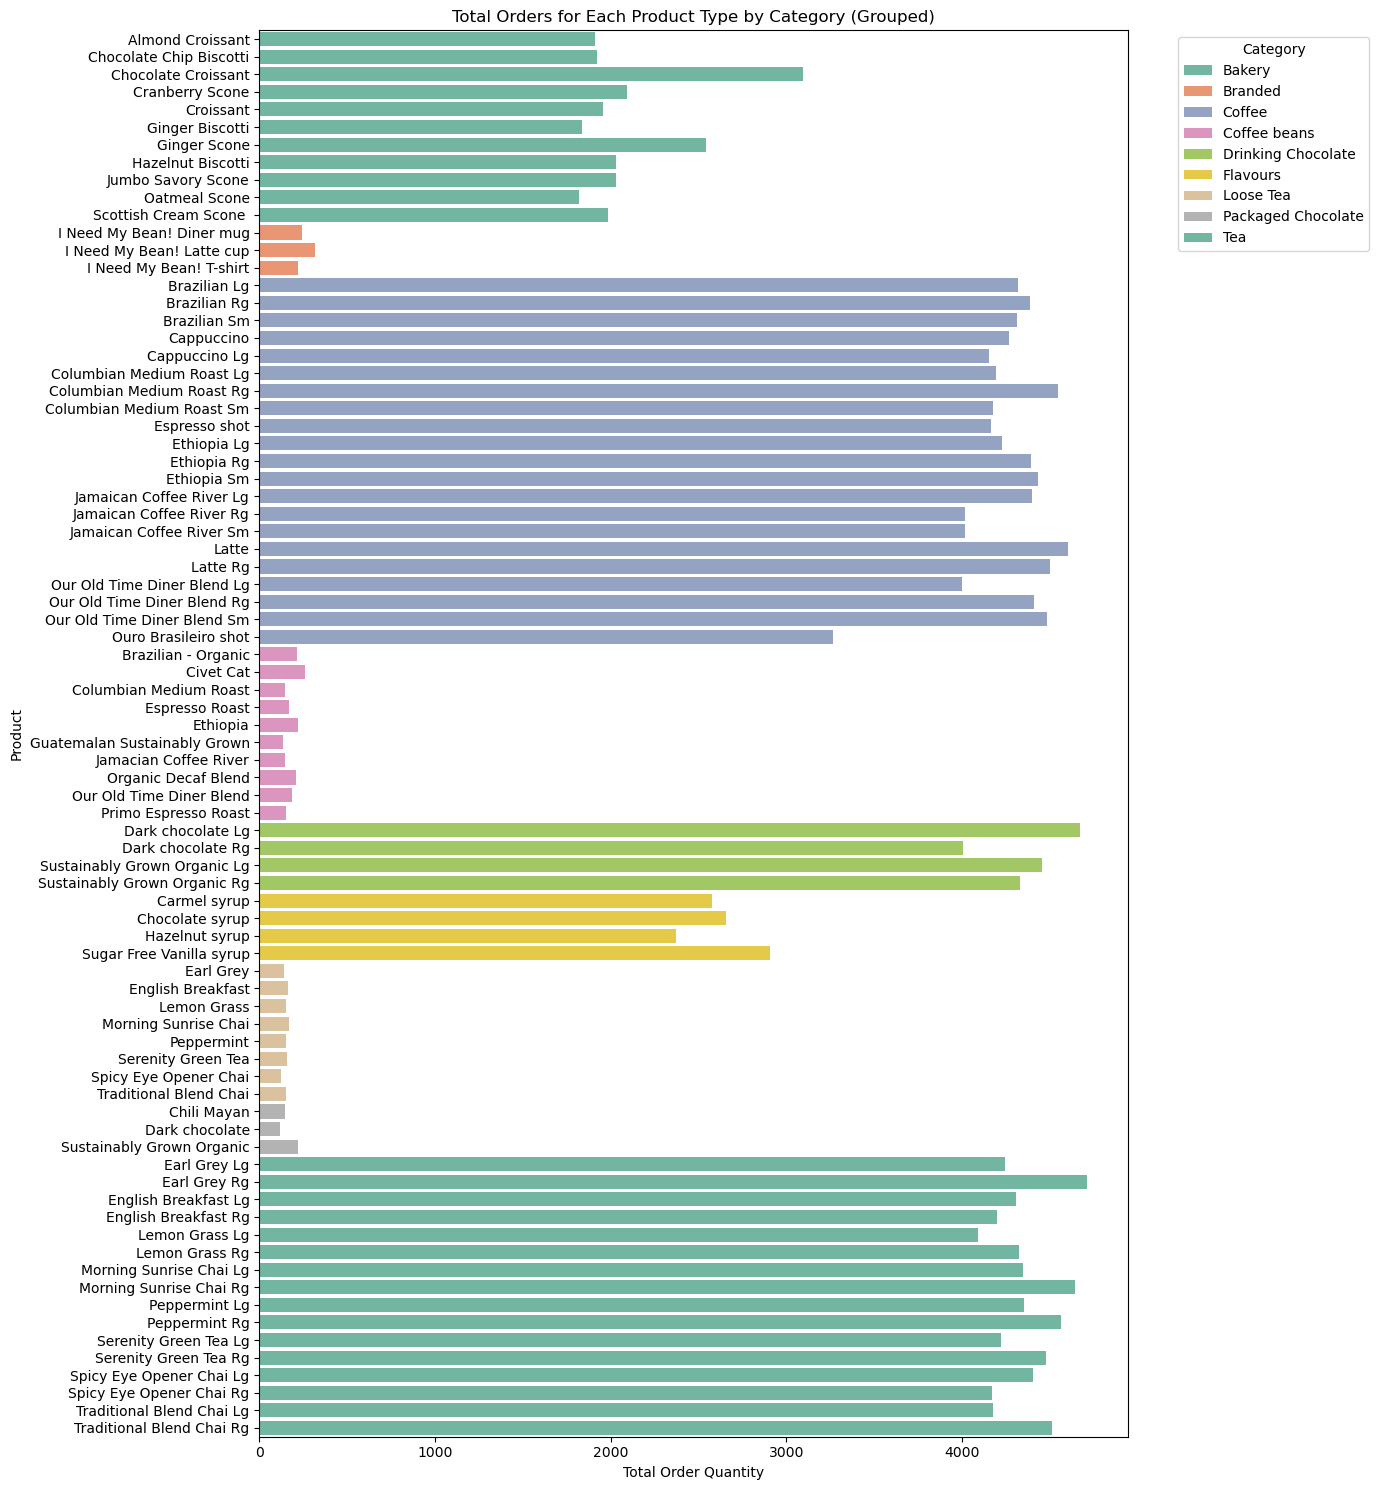

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'category' and then by 'product'
total_orders_sorted = total_orders.sort_values(by=['category', 'product'])

# Create a stacked bar chart
plt.figure(figsize=(14, 15))

# Plotting the total orders by product, with products grouped by category
sns.barplot(
    data=total_orders_sorted, 
    x='total_order', 
    y='product', 
    hue='category', 
    dodge=False,  # Disable dodging to make it stacked
    palette="Set2"
)

# Adding title and labels
plt.title('Total Orders for Each Product Type by Category (Grouped)')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("totalOrderEachProductType.pdf")

# Displaying the plot
plt.show()